# Unit-6: : The Storyteller


### Learning Outcomes
By the end of this unit, students will be capable of:
* Identifying latitude and longitude as coordinates of location
* Plotting geographic data on a coordinate graph
* Visualizing locations on an interactive map
* Describing spatial patterns and constructing a simple data-based story

## Introduction

For thousands of years, people have tried to understand the world by drawing maps. Ancient astronomers used careful measurements of shadows and star positions to mark directions. Travelers and scholars noted the locations of rivers, mountains, and trade routes. Temple builders used precise geometry to align structures with the sunrise or certain stars. All of these are examples of using space and location to discover patterns.

Today, we can do something similar using computers. When you place data on a map, small patterns become clear. You can see how places relate to each other, how far they are, or how they form clusters. Maps help turn numbers into a story that you can see.

In this unit, you will take simple geographic data, plot it on a graph, and then place it on a real map of India. This lets you experience how location data can tell a meaningful story.

## Activity 6.1: Creating and Viewing a Small Geography Dataset

We will begin with a small dataset of Indian cities. Each city has two important numbers:

* Latitude
* Longitude

These two numbers act like coordinates that tell you exactly where the city is on Earth. Latitude tells you how far north or south a place is. Longitude tells you how far east or west a place is.

Let us create a small DataFrame of ten cities.

In [2]:
import pandas as pd

data = {
    "City": ["Delhi", "Mumbai", "Chennai", "Kolkata", "Bengaluru",
             "Jaipur", "Patna", "Shillong", "Kochi", "Ahmedabad"],
    "Latitude": [28.7041, 19.0760, 13.0827, 22.5726, 12.9716,
                 26.9124, 25.5941, 25.5788, 9.9312, 23.0225],
    "Longitude": [77.1025, 72.8777, 80.2707, 88.3639, 77.5946,
                  75.7873, 85.1376, 91.8933, 76.2673, 72.5714]
}

df = pd.DataFrame(data)
df


,City,Latitude,Longitude
0,Delhi,28.7041,77.1025
1,Mumbai,19.0760,72.8777
2,Chennai,13.0827,80.2707
3,Kolkata,22.5726,88.3639
4,Bengaluru,12.9716,77.5946
5,Jaipur,26.9124,75.7873
6,Patna,25.5941,85.1376
7,Shillong,25.5788,91.8933
8,Kochi,9.9312,76.2673
9,Ahmedabad,23.0225,72.5714


Each row is one city and its position on the globe.

## Activity 6.2: Plotting Locations on a Simple Graph

Latitude and longitude are numbers, so you can plot them on a simple x-y graph. Longitude can be on the x axis and latitude on the y axis. This will show you where the cities lie relative to each other.

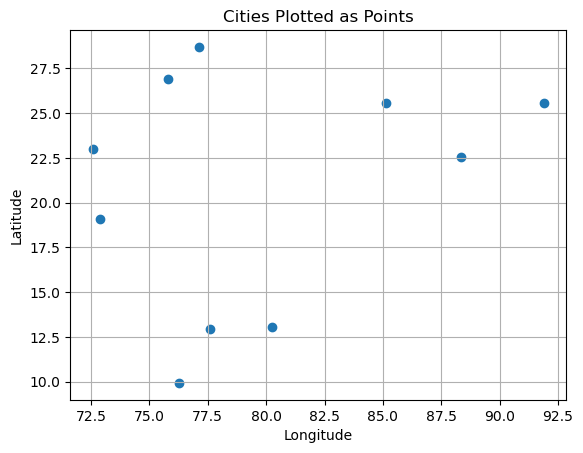

In [3]:
import matplotlib.pyplot as plt

plt.scatter(df["Longitude"], df["Latitude"])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Cities Plotted as Points")
plt.grid(True)
plt.show()

You will see a group of points, but it will not look like the map of India. The shape may seem stretched or rotated. This happens because a plain graph treats latitude and longitude as simple numbers instead of coordinates on a curved Earth.

This plot is still useful because it shows which cities are north or south, and which are east or west, but it does not show the true shape of our beautiful country.

To see the correct shape, we need a real map.

## Activity 6.3: Visualizing the Same Points on an Actual Map

We will use a simple mapping library called folium. It allows us to place markers on an interactive map. Now create a map centered roughly on India and add markers for each city.

In [4]:
import folium

# Create a map centered on India
m = folium.Map(location=[22.0, 80.0], zoom_start=5)

# Add city markers
for i in range(len(df)):
    folium.Marker(
        location=[df.loc[i, "Latitude"], df.loc[i, "Longitude"]],
        popup=df.loc[i, "City"]
    ).add_to(m)

m

Now you will see the cities placed on a real, correctly shaped map of India. The distances, directions, and relative positions make more sense. This is the power of geographic visualization.

## Activity 6.4: Finding a Story Inside the Map

A map is more than a picture. It helps you notice relationships and patterns. Take a moment to look at the map and think about what it shows.

For example:

* Which cities are farthest north
* Which ones are close to the sea
* Which ones lie in the eastern region of India
* Which ones are clustered in central India

These observations help you form a story about the geography of the country. Data placed on a map often reveals things that are hard to see in a table.

You can print the DataFrame again if you want to look at the numbers.

## Practice Exercises

Try these exercises to strengthen your understanding. Hints and solutions are provided below.

1. Add two more cities of your choice to the DataFrame and plot them on the map. *Hint: Add two new rows with latitude and longitude.*
2. Create a map that shows only the southern cities. *Hint: Filter cities with latitude less than 15.*
3. Find which city in the list is farthest north and farthest south. *Hint: Use `df["Latitude"].max()` and `df["Latitude"].min()`.*
4. Compute the simple distance between two cities using the normal distance formula. *Hint: Use `(lat1 - lat2)**2 + (lon1 - lon2)**2`.*
5. Try centering the folium map on another region, such as the northeast, and place the same city markers on the new map. *Hint: Change the location parameter when creating the map. Also, when you create a new map object, you must add markers again. Folium does not automatically copy them over.*

### Solutions

1. Adding new cities:

In [5]:
df.loc[len(df)] = ["Hyderabad", 17.3850, 78.4867]
df.loc[len(df)] = ["Pune", 18.5204, 73.8567]

2. Filtering southern cities:

In [6]:
south = df[df["Latitude"] < 15]
south

,City,Latitude,Longitude
2,Chennai,13.0827,80.2707
4,Bengaluru,12.9716,77.5946
8,Kochi,9.9312,76.2673


3. Northmost and southmost cities:

In [7]:
df.loc[df["Latitude"].idxmax()]
df.loc[df["Latitude"].idxmin()]

City           Kochi
Latitude      9.9312
Longitude    76.2673
Name: 8, dtype: object

4. Distance between two cities:

In [8]:
lat1, lon1 = df.loc[0, "Latitude"], df.loc[0, "Longitude"]
lat2, lon2 = df.loc[1, "Latitude"], df.loc[1, "Longitude"]

distance = ((lat1 - lat2)**2 + (lon1 - lon2)**2)**0.5
distance

10.514240089041149

5. Changing the map center:

In [10]:
# New map centered on the northeast
m2 = folium.Map(location=[25.5, 92.0], zoom_start=6)

# Add the same city markers again
for i in range(len(df)):
    folium.Marker(
        location=[df.loc[i, "Latitude"], df.loc[i, "Longitude"]],
        popup=df.loc[i, "City"]
    ).add_to(m2)

m2

## Reflection

You have now seen how numbers can turn into a map, and how a map can turn into a story. Before computers, scholars used careful observation to understand geography. Today, we can place many points on a map and see patterns instantly.

Reflect on what you learned.

* Why does a simple x-y plot not look like a real map
* What did folium help you see more clearly
* How do maps help us understand patterns in the world
* What story did the city positions tell you
* How does this connect with what you learned in earlier units about patterns and visualization